In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np
import ModelAuto as ma
sns.set()

In [2]:
data = pd.read_csv('DataSet/preprocessed.csv')

In [3]:
data.head()

,Unnamed: 0,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,...,registered_via,registration_init_time,expiration_date,membership_days,registration_year,registration_month,registration_day,expiration_year,expiration_month,expiration_day
0,0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,...,7,2012-01-02,2017-10-05,2103 days,2012,1,2,2017,10,5
1,1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,...,9,2011-05-25,2017-09-11,2301 days,2011,5,25,2017,9,11
2,2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,...,9,2011-05-25,2017-09-11,2301 days,2011,5,25,2017,9,11
3,3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,...,9,2011-05-25,2017-09-11,2301 days,2011,5,25,2017,9,11
4,4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,...,7,2012-01-02,2017-10-05,2103 days,2012,1,2,2017,10,5


In [6]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [10]:
# Source System Tab

In [15]:
d = data.source_system_tab.value_counts()
d

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
UnKnown           24849
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

In [164]:
def get_prob(feature):
    
    d = dict(feature.value_counts())
    keys = d.keys()
    val = []
    #print('Krys : ',keys)
    for k in keys:
        
        g = feature.where((feature==k) & (data['target']==1))
        p_sum = g.count()
        p_for_1 = p_sum/d[k]
        p_for_1 = (p_for_1)
        d[k] = p_for_1
        val.append(p_for_1)
    
    fig = plt.figure(figsize=(25,10))
    plt.ylabel('Prob of getting 1')
    plt.bar(keys,val)
    plt.show()
    return pd.DataFrame(d.values(),index=d.keys())#,keys,val
        

<AxesSubplot:xlabel='source_system_tab', ylabel='Count'>

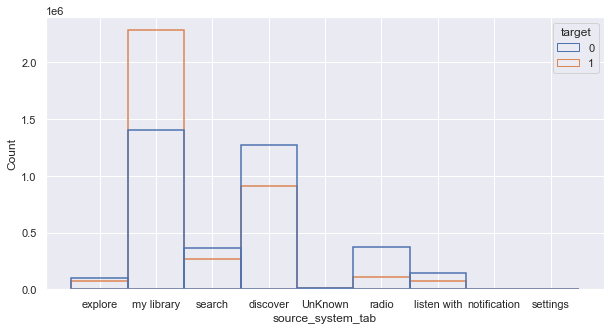

In [137]:
fig = plt.figure(figsize=(10,5))
sns.histplot(data=data,x='source_system_tab',hue='target',fill=False)

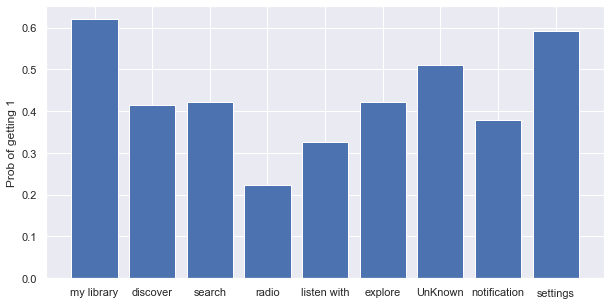

In [154]:
get_prob(data.source_system_tab)

It looks like there is above 50% probarility that a song is hard again if it is in my library or in 
setting(though very less instances to claim this)

In [155]:
d = data.source_screen_name.value_counts()
d

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
UnKnown                  414804
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

<AxesSubplot:xlabel='source_screen_name', ylabel='Count'>

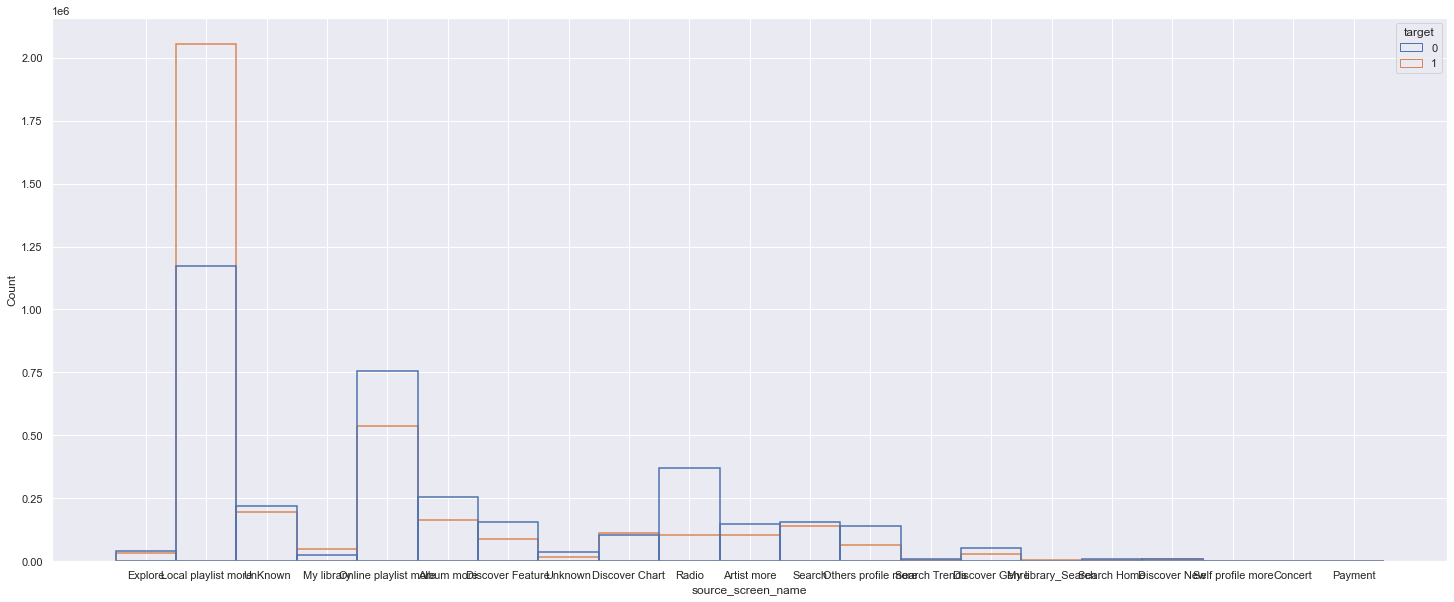

In [161]:
fig = plt.figure(figsize=(25,10))
sns.histplot(data=data,x='source_screen_name',hue='target',fill=False)

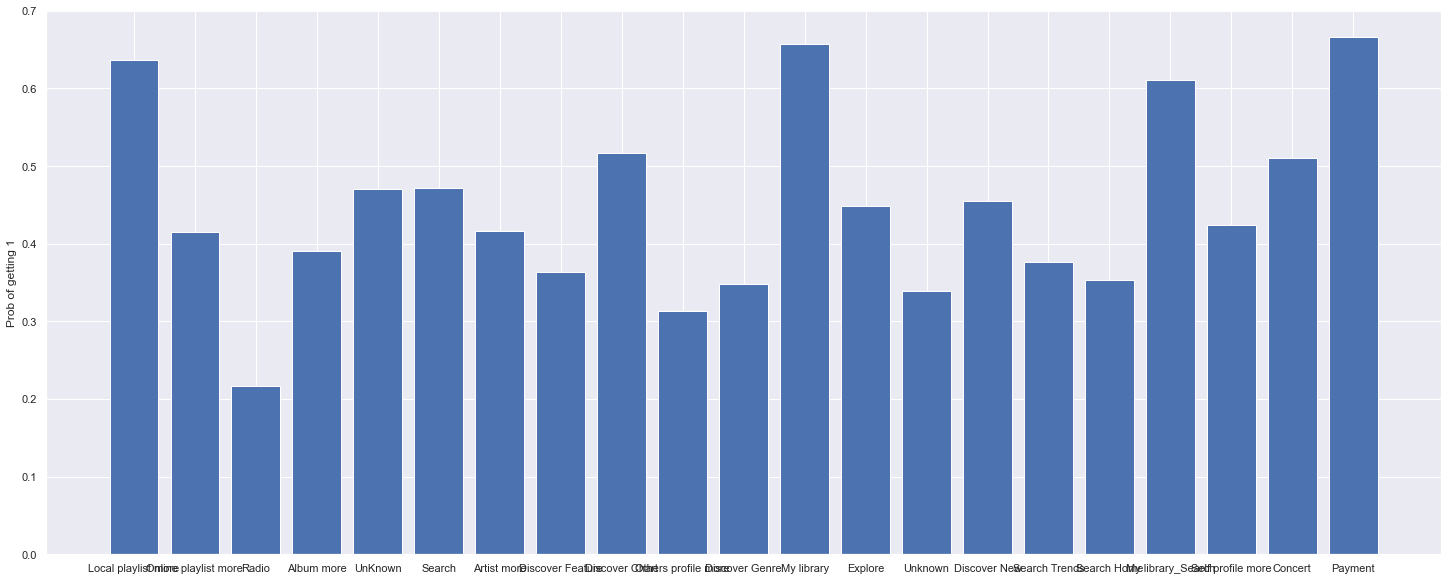

,0
Local playlist more,0.636983
Online playlist more,0.414939
Radio,0.217256
Album more,0.390553
UnKnown,0.469788
Search,0.471749
Artist more,0.416858
Discover Feature,0.364104
Discover Chart,0.517032
Others profile more,0.312629


In [165]:
get_prob(data.source_screen_name)